## Задачи
<ol>
<li>Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.</li>
<li>Какие значения находятся в колонке transaction? Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота. Подумайте, как можно улучшить график.</li>
<li>Сколько транзакций завершились ошибкой?</li>
<li>Сколько успешных транзакций осуществил каждый из пользователей? Постройте гистограмму распределения числа успешных транзакций.</li>
<li>Коллега прислал Вам обновленные данные. Постройте сводную таблицу user_vs_minute_pivot, где в качестве столбцов будут использованы имена пользователей, строк – минуты, значений – число совершенных операций в указанную минуту. Пропущенные значения заполните нулями.</li>
<li>Изучите представленный график. Помогите коллеге разобраться,  есть ли в данных ошибка, или же всё хорошо.</li>
<li>Если в данные закралась ошибка, исправьте её и сохраните правильное число минут, прошедших с начала дня, в колонку true_minute.</li>
</ol>

#### Описание данных:
* date – дата (2020-03-02 00:00:00 – 2020-03-02 01:29:05)
* name – имя пользователя
* transaction – статус транзакции
* minute – сколько минут прошло с начала дня (доступна в данных с 5 шага).

In [1]:
# Загрузите датасет transaction_data.csv.
# Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
transaction_df = pd.read_csv('transaction_data.csv')

In [4]:
transaction_df.shape

(5315, 3)

In [5]:
transaction_df.dtypes

date           object
name           object
transaction    object
dtype: object

In [6]:
transaction_df.isna().sum()

date           0
name           0
transaction    0
dtype: int64

In [7]:
transaction_df.describe()

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:33:10,Masha_Ozerova,successfull
freq,6,112,3692


In [8]:
# Проверьте, какие значения принимает колонка transaction.
# Сколько наблюдений относятся к тому или иному уровню?
# Визуализируйте результат с помощью барплота.

In [9]:
transaction_type = transaction_df.transaction.unique()
transaction_type

array(['cancelled', 'successfull', 'error'], dtype=object)

In [10]:
transaction_number = transaction_df.transaction.value_counts()
transaction_number

successfull    3692
cancelled      1619
error             4
Name: transaction, dtype: int64

<AxesSubplot:>

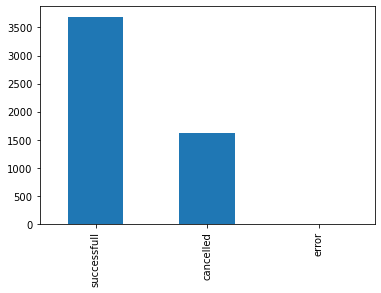

In [11]:
transaction_number.plot.bar()

<AxesSubplot:ylabel='transaction'>

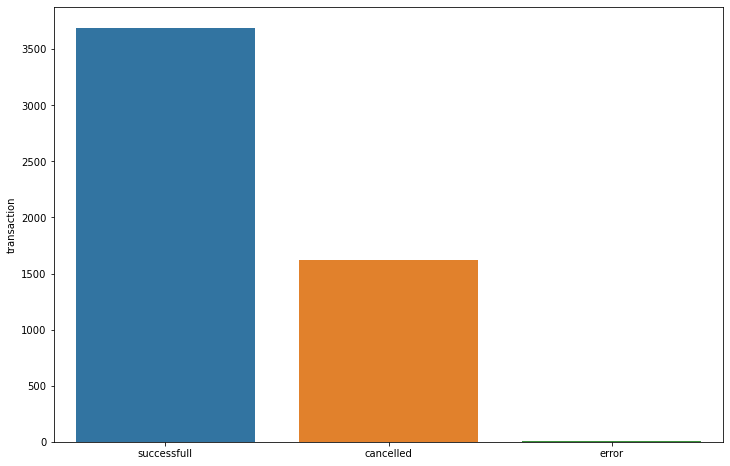

In [12]:
plt.figure(figsize=(12,8))
sns.barplot(x=transaction_number.index, y=transaction_number)

<AxesSubplot:ylabel='transaction'>

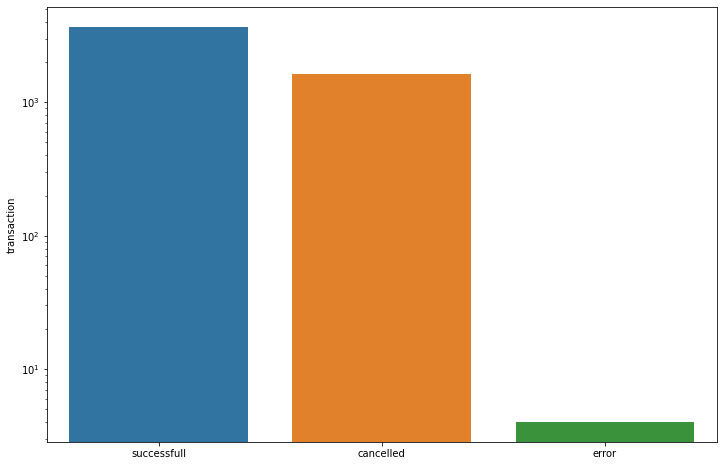

In [13]:
plt.figure(figsize=(12,8))
sns.barplot(x=transaction_number.index, y=transaction_number, log=True)

In [14]:
# Сколько транзакций завершились ошибкой?

In [15]:
transaction_df.query('transaction == "error"').transaction.count()

4

In [16]:
# Сколько транзакций осуществил каждый из пользователей?
# Осуществлёнными считаются транзакции со значением successfull
# Посмотрите на характеристики распределения, а затем постройте гистограмму числа успешных транзакций,
# совершённых каждым пользователем, где
# по оси x – число транзакций
# по оси y – доля пользователей с таким числом транзакций

In [17]:
success_users_transactions = transaction_df.query('transaction == "successfull"') \
                                           .name.value_counts() \
                                           .rename('transactions_number')
success_users_transactions

Svetlana_Smirnova      82
Olga_Smirnova          80
Masha_Ozerova          80
Svetlana_Ivanova       79
Masha_Polyanova        78
Svetlana_Polyanova     78
Ekaterina_Smirnova     77
Irina_Ozerova          76
Irina_Lesnova          76
Lolita_Ivanova         76
Julia_Petrova          74
Masha_Ivanova          73
Olga_Fedorova          72
Ekaterina_Fedorova     72
Ekaterina_Ozerova      72
Olga_Polyanova         70
Lolita_Fedorova        70
Masha_Fedorova         69
Ekaterina_Polyanova    68
Ekaterina_Petrova      68
Julia_Smirnova         67
Svetlana_Fedorova      67
Olga_Petrova           67
Julia_Fedorova         67
Irina_Petrova          66
Lolita_Smirnova        65
Olga_Ozerova           65
Lolita_Petrova         64
Olga_Ivanova           64
Vasilisa_Smirnova      64
Masha_Lesnova          63
Julia_Ivanova          63
Vasilisa_Petrova       63
Irina_Smirnova         63
Lolita_Ozerova         63
Ekaterina_Lesnova      63
Masha_Petrova          62
Vasilisa_Ozerova       62
Svetlana_Oze

<AxesSubplot:>

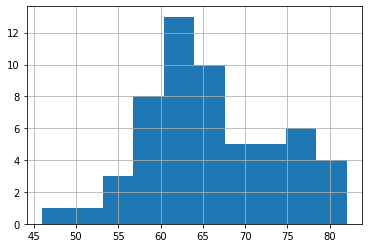

In [18]:
success_users_transactions.hist()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='transactions_number'>

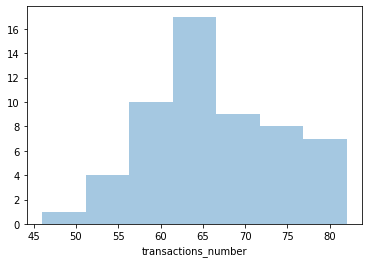

In [19]:
sns.distplot(success_users_transactions, kde=False)

In [20]:
success_users_transactions.median()

64.0

In [21]:
success_users_transactions.mean()

65.92857142857143

In [22]:
success_users_transactions.quantile(0.25)

61.0

In [23]:
# Коллега прислал Вам обновленные данные.
# Постройте сводную таблицу user_vs_minute_pivot, где в качестве столбцов будут использованы имена пользователей,
# строк – минуты, значений – число совершенных операций в указанную минуту.
# Пропущенные значения заполните нулями.

In [24]:
transaction_df_updated = pd.read_csv('transaction_data_updated.csv', parse_dates=['date'])
transaction_df_updated

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17
...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13


In [25]:
user_vs_minute_pivot = transaction_df_updated.groupby(['name', 'minute'], as_index=False) \
                                                .agg({'transaction': 'count'}) \
                                                .pivot(index='minute', columns='name', values='transaction') \
                                                .fillna(0)

In [26]:
user_vs_minute_pivot = transaction_df_updated.pivot_table(index='minute',
                                                          columns='name',
                                                          values='transaction',
                                                          aggfunc='count',
                                                          fill_value=0)

In [27]:
# Коллега построил следующий график по сводной таблице из предыдущего шага,
# и сомневается, что в данных нет ошибки. 
#     по оси x – минута транзакции (сколько минут прошло с начала дня)
#     по оси y – число транзакций
# Как вы думаете, из-за чего мы видим такую картину?
# Произошла ошибка, или с данными всё хорошо?

<AxesSubplot:xlabel='minute'>

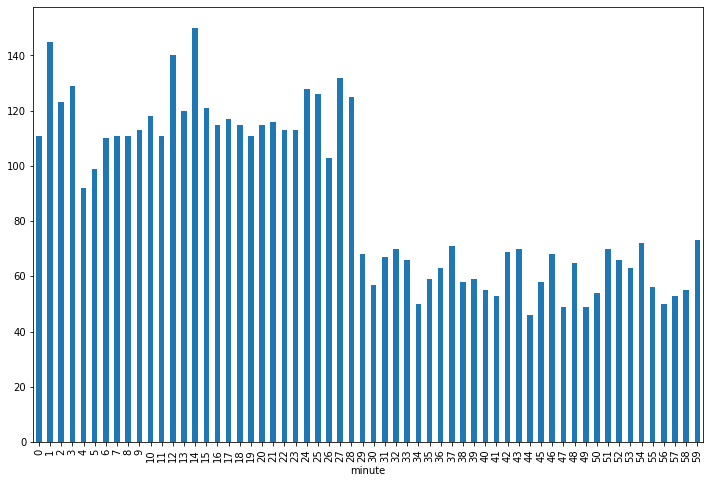

In [28]:
user_vs_minute_pivot.sum(axis=1).plot.bar(figsize=(12, 8))

Произошла ошибка. Извлекли минутную часть времени, а не число минут с начала дня.

In [29]:
# Исправьте ошибку коллеги (если она есть 😉), и посчитайте число минут, прошедших с начала дня.
# Результат сохраните в колонку true_minute.
# Постройте график, как в предыдущем шаге, и посмотрите, произошли ли изменения.

In [30]:
houres_in_minutes = transaction_df_updated.date.dt.hour * 60
minutes = transaction_df_updated.date.dt.minute
transaction_df_updated = transaction_df_updated.assign(true_minute = houres_in_minutes + minutes)
transaction_df_updated

,date,name,transaction,minute,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17
...,...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13,13


<AxesSubplot:xlabel='true_minute', ylabel='count'>

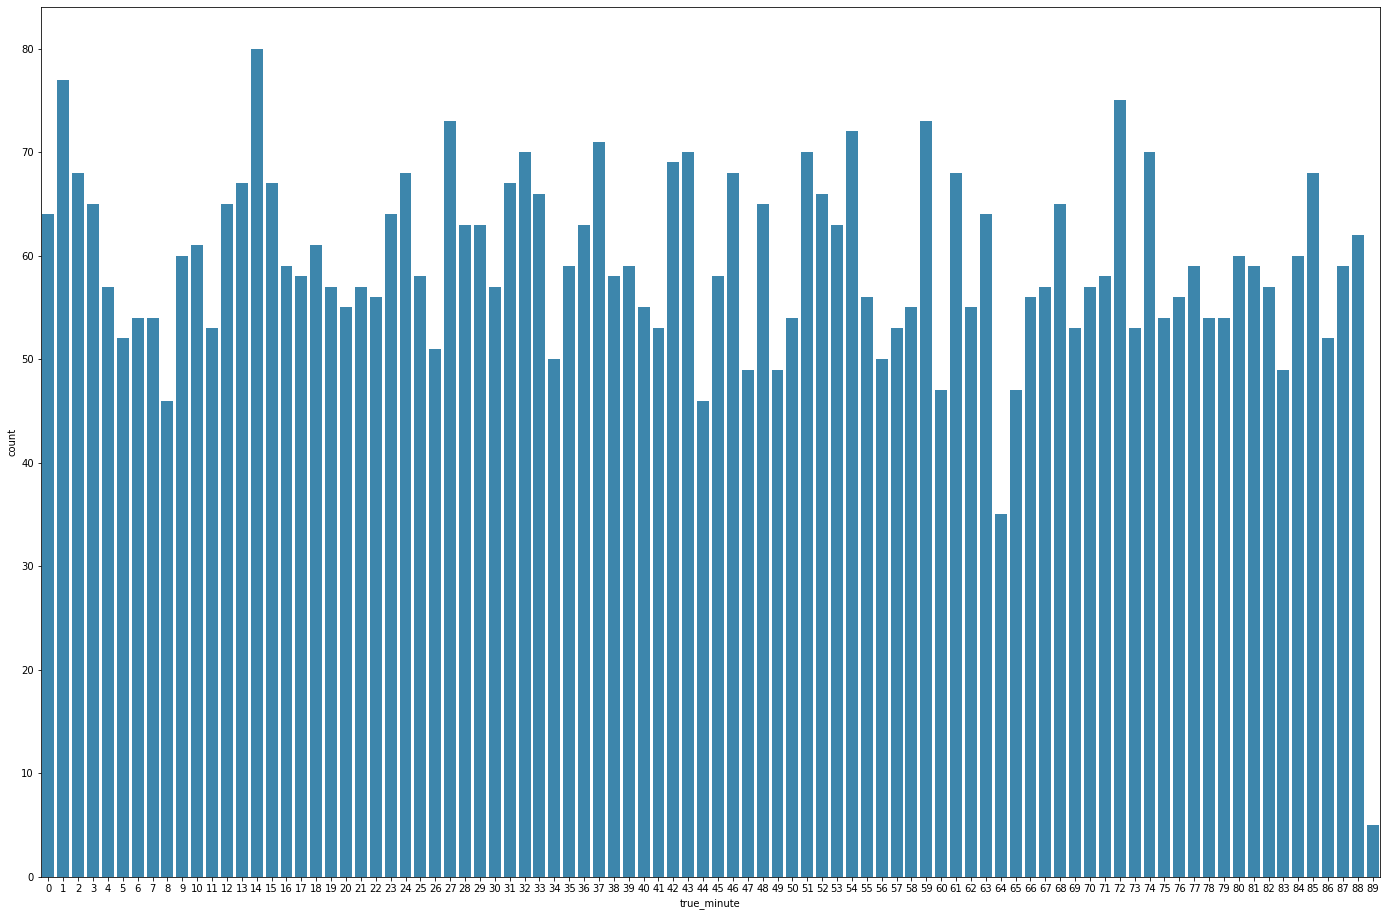

In [31]:
plt.figure(figsize=(24,16))
sns.countplot(x='true_minute', data=transaction_df_updated, color='#2b8cbe')